In [68]:
!pip install squarify


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python của trang/Python ở lớp /uk_online_sale_2022_2023.csv')

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2022 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2022 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2022 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2022 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2022 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2023 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2023 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2023 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/09/2023 12:50,4.95,12680.0,France


In [7]:
df['InvoiceDate']

0          12/01/2022 8:26
1          12/01/2022 8:26
2          12/01/2022 8:26
3          12/01/2022 8:26
4          12/01/2022 8:26
                ...       
541905    12/09/2023 12:50
541906    12/09/2023 12:50
541907    12/09/2023 12:50
541908    12/09/2023 12:50
541909    12/09/2023 12:50
Name: InvoiceDate, Length: 541910, dtype: object

**Data Preprocessing**

In [9]:
# Ép kiểu dữ liệu về đúng định dạng
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M', errors = 'coerce')

In [14]:
df = df[df['Customer ID'].isnull() == False]  # lấy những ông nào không phải null
# df = df[~df['Customer ID].isnull()]

In [15]:
df[df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [16]:
df['Customer ID'] = df['Customer ID'].astype(int).astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423847 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      423847 non-null  object        
 1   StockCode    423847 non-null  object        
 2   Description  423697 non-null  object        
 3   Quantity     423847 non-null  int64         
 4   InvoiceDate  423847 non-null  datetime64[ns]
 5   Price        423847 non-null  float64       
 6   Customer ID  423847 non-null  object        
 7   Country      423847 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 29.1+ MB


In [18]:
df = df[df['Quantity'] >0]

In [19]:
df[df['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [20]:
df.shape

(414817, 8)

Transform data

In [21]:
df['Sales'] = df['Price'] * df['Quantity']

In [22]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2023-12-09 12:50:00,4.95,12680,France,14.85


In [25]:
from datetime import date,datetime
datetime.now()

datetime.datetime(2024, 5, 28, 14, 13, 55, 179636)

Tính điểm RFM

In [30]:
df['R'] = (datetime.now() - df['InvoiceDate']).dt.days

In [34]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,R
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30,544
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,544
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00,544
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,544
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,544
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680,France,12.60,171
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680,France,16.60,171
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680,France,16.60,171
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2023-12-09 12:50:00,4.95,12680,France,14.85,171


In [36]:
rfm = df.groupby (by = 'Customer ID')\
    .agg (
        R = ('R', 'min'),
        F = ('Invoice', 'nunique'),
        M = ('Sales', 'sum'),
    )\
    .reset_index()
rfm

,Customer ID,R,F,M
0,12346,496,1,77183.60
1,12347,172,8,11225.65
2,12348,246,4,1797.24
3,12349,189,1,1757.55
4,12350,480,4,5855.54
...,...,...,...,...
4343,18288,524,30,30992.72
4344,18289,539,17,1640.82
4345,18290,503,27,15801.37
4346,18291,503,11,4264.04


In [37]:
R_quantile = rfm['R'].quantile ([0.2, 0.4, 0.6, 0.8])
R_quantile[0.2]

184.0

In [38]:
rfm[rfm['R'] >= R_quantile[0.8]]

,Customer ID,R,F,M
0,12346,496,1,77183.60
4,12350,480,4,5855.54
6,12353,374,1,89.00
7,12354,403,1,1079.40
8,12355,385,1,459.40
...,...,...,...,...
4343,18288,524,30,30992.72
4344,18289,539,17,1640.82
4345,18290,503,27,15801.37
4346,18291,503,11,4264.04


In [39]:
labels = [str(i) for i in range (5, 0, -1)]
labels

['5', '4', '3', '2', '1']

In [40]:
rfm.loc[rfm['R'] >= R_quantile[0.8], 'R_label'] = labels[0]
rfm.loc[(rfm['R'] >= R_quantile[0.6]) & (rfm['R'] < R_quantile[0.8]) , 'R_label'] = labels[1]
rfm.loc[(rfm['R'] >= R_quantile[0.4]) & (rfm['R'] < R_quantile[0.6]) , 'R_label'] = labels[2]
rfm.loc[(rfm['R'] >= R_quantile[0.2]) & (rfm['R'] < R_quantile[0.4]) , 'R_label'] = labels[3]
rfm.loc[rfm['R'] < R_quantile[0.2] , 'R_label'] = labels[4]

In [41]:
rfm.loc[rfm['R_label'] == '5', :]

,Customer ID,R,F,M,R_label
0,12346,496,1,77183.60,5
4,12350,480,4,5855.54,5
6,12353,374,1,89.00,5
7,12354,403,1,1079.40,5
8,12355,385,1,459.40,5
...,...,...,...,...,...
4343,18288,524,30,30992.72,5
4344,18289,539,17,1640.82,5
4345,18290,503,27,15801.37,5
4346,18291,503,11,4264.04,5


In [42]:
def label_by_quantile (rfm, column, reversed = False):
    list_quantile = rfm[column].quantile ([0.2, 0.4, 0.6, 0.8])

    if reversed:
        labels = [str(i) for i in range (5, 0, -1)]
    else:
        labels = [str(i) for i in range (1, 6)]

    new_column = column + '_label'

    rfm.loc[rfm[column] >= list_quantile[0.8], new_column] = labels[0]
    rfm.loc[(rfm[column] >= list_quantile[0.6]) & (rfm[column] < list_quantile[0.8]) , new_column] = labels[1]
    rfm.loc[(rfm[column] >= list_quantile[0.4]) & (rfm[column] < list_quantile[0.6]) , new_column] = labels[2]
    rfm.loc[(rfm[column] >= list_quantile[0.2]) & (rfm[column] < list_quantile[0.4]) , new_column] = labels[3]
    rfm.loc[rfm[column] < list_quantile[0.2] , new_column] = labels[4]
    return rfm

rfm = label_by_quantile(rfm, 'M')
rfm = label_by_quantile(rfm, 'F')

In [43]:
rfm['label'] = rfm['R_label'] + rfm['F_label'] + rfm['M_label']

In [44]:
rfm

,Customer ID,R,F,M,R_label,M_label,F_label,label
0,12346,496,1,77183.60,5,1,4,541
1,12347,172,8,11225.65,1,1,1,111
2,12348,246,4,1797.24,4,2,2,422
3,12349,189,1,1757.55,2,2,4,242
4,12350,480,4,5855.54,5,1,2,521
...,...,...,...,...,...,...,...,...
4343,18288,524,30,30992.72,5,1,1,511
4344,18289,539,17,1640.82,5,2,1,512
4345,18290,503,27,15801.37,5,1,1,511
4346,18291,503,11,4264.04,5,1,1,511


In [45]:
url = 'https://docs.google.com/spreadsheets/d/1uRIXEnCAYcPPGXO_wKQhh3whPh3yyOsL/edit#gid=820015692'

csv_export_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_ranking = pd.read_csv(csv_export_url)
rfm_ranking

,Segment,Scores
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
4,New Customers,"512, 511, 422, 421, 412, 411, 311"
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [46]:
rfm_ranking['Scores'] = rfm_ranking['Scores'].str.replace (', ', ',')
rfm_ranking['Scores'] = rfm_ranking['Scores'].str.split(',')

In [47]:
rfm_ranking = rfm_ranking.explode ('Scores')

In [48]:
rfm_ranking

,Segment,Scores
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [49]:
rfm = rfm.merge (rfm_ranking, how = 'left', left_on = 'label', right_on = 'Scores').iloc [:, :9]

Analysis

In [50]:
rfm

,Customer ID,R,F,M,R_label,M_label,F_label,label,Segment
0,12346,496,1,77183.60,5,1,4,541,Potential Loyalist
1,12347,172,8,11225.65,1,1,1,111,Lost customers
2,12348,246,4,1797.24,4,2,2,422,New Customers
3,12349,189,1,1757.55,2,2,4,242,At Risk
4,12350,480,4,5855.54,5,1,2,521,Promising
...,...,...,...,...,...,...,...,...,...
4343,18288,524,30,30992.72,5,1,1,511,New Customers
4344,18289,539,17,1640.82,5,2,1,512,New Customers
4345,18290,503,27,15801.37,5,1,1,511,New Customers
4346,18291,503,11,4264.04,5,1,1,511,New Customers


In [51]:
rfm_summarised = rfm.groupby ('Segment')\
    .agg (
        CustomerCount = ('Customer ID', 'nunique'),
        TotalRecency = ('R', 'sum'),
        TotalSales = ('M', 'sum'),
        TotalFreq = ('F', 'sum'),
        MeanRecency = ('R', 'mean'),
        MeanFreq = ('F', 'mean'),
        MeanSales = ('M', 'mean')
    )\
    .reset_index()
rfm_summarised

,Segment,CustomerCount,TotalRecency,TotalSales,TotalFreq,MeanRecency,MeanFreq,MeanSales
0,About To Sleep,147,30958,410587.130,701,210.598639,4.768707,2793.109728
1,At Risk,424,79213,146512.570,691,186.823113,1.629717,345.548514
2,Cannot Lose Them,32,5715,14995.520,90,178.593750,2.812500,468.610000
3,Champions,687,286367,142267.630,687,416.836972,1.000000,207.085342
4,Hibernating customers,878,169707,1891922.650,4624,193.288155,5.266515,2154.809396
5,Lost customers,478,84110,4393446.120,7194,175.962343,15.050209,9191.309874
6,Loyal,445,120013,140643.971,495,269.692135,1.112360,316.053867
7,Need Attention,325,95768,141593.100,574,294.670769,1.766154,435.671077
8,New Customers,294,79251,1126537.530,2047,269.561224,6.962585,3831.760306
9,Potential Loyalist,507,147076,571432.793,1180,290.090730,2.327416,1127.086377


In [52]:
def plot_histogram (data, i, x_label, y_label, chart_title, xbins = 10):
    sns.histplot (data, ax = ax[i], bins = xbins, color = '#42b8eb')
    ax[i].set_xlabel (x_label)
    ax[i].set_ylabel (y_label)
    ax[i].set_title (chart_title)


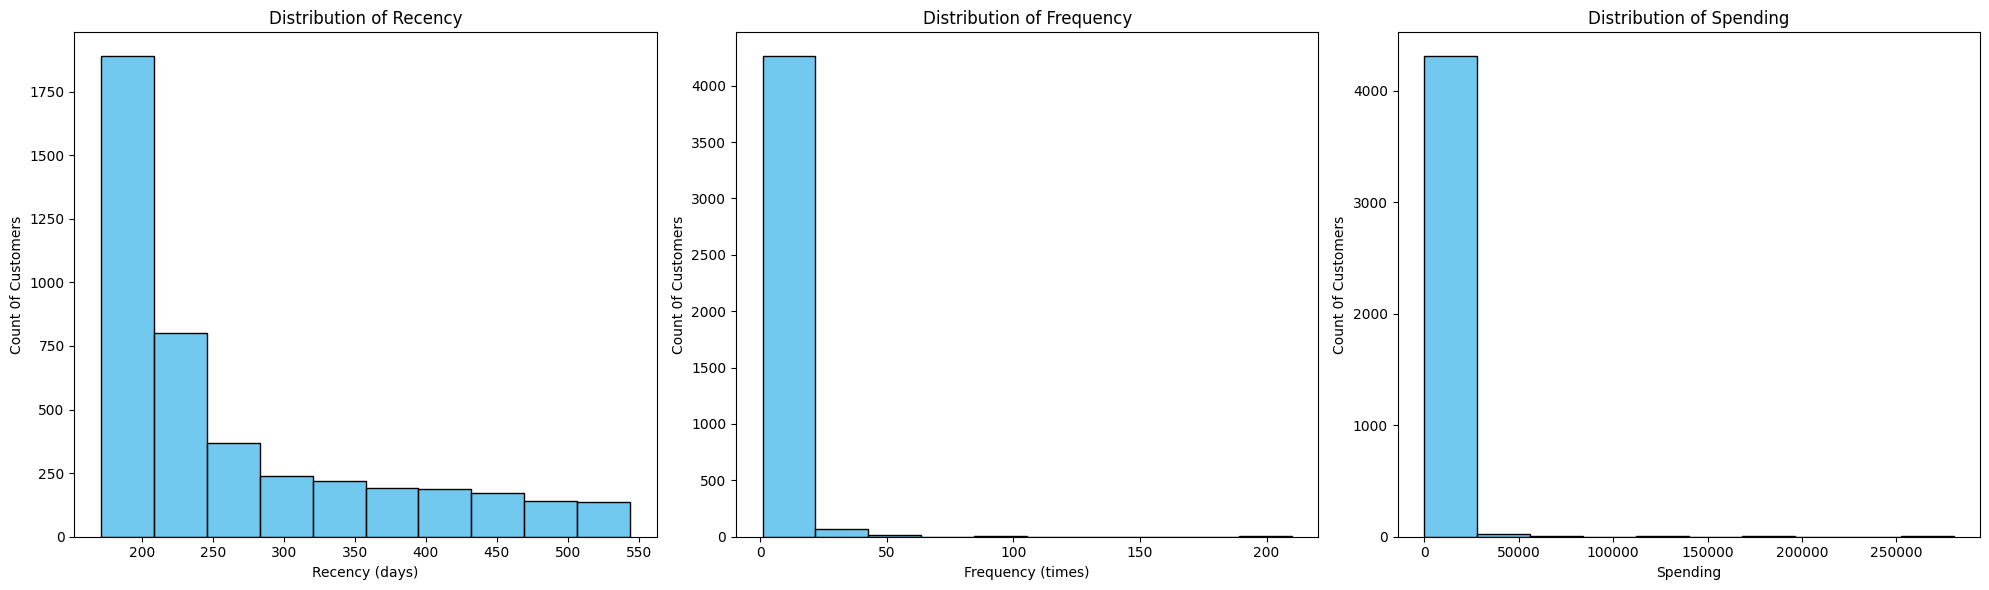

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

plot_histogram (rfm['R'], 0, 'Recency (days)', 'Count 0f Customers', 'Distribution of Recency')
plot_histogram (rfm['F'], 1, 'Frequency (times)', 'Count 0f Customers', 'Distribution of Frequency')
plot_histogram (rfm['M'], 2, 'Spending', 'Count 0f Customers', 'Distribution of Spending')

plt.tight_layout()
plt.show()


<Axes: xlabel='F', ylabel='R'>

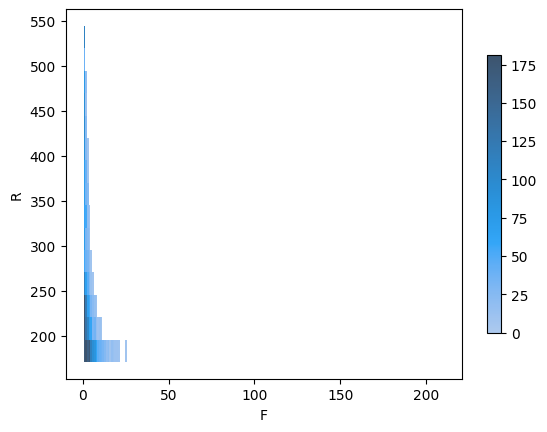

In [54]:
sns.histplot(
    rfm, x = 'F', y = "R",
    bins= 15, discrete=(True, False),
    pthresh=.05, pmax=.9, cbar = True, cbar_kws=dict(shrink=.75)
)

In [55]:
rfm_summarised

,Segment,CustomerCount,TotalRecency,TotalSales,TotalFreq,MeanRecency,MeanFreq,MeanSales
0,About To Sleep,147,30958,410587.130,701,210.598639,4.768707,2793.109728
1,At Risk,424,79213,146512.570,691,186.823113,1.629717,345.548514
2,Cannot Lose Them,32,5715,14995.520,90,178.593750,2.812500,468.610000
3,Champions,687,286367,142267.630,687,416.836972,1.000000,207.085342
4,Hibernating customers,878,169707,1891922.650,4624,193.288155,5.266515,2154.809396
5,Lost customers,478,84110,4393446.120,7194,175.962343,15.050209,9191.309874
6,Loyal,445,120013,140643.971,495,269.692135,1.112360,316.053867
7,Need Attention,325,95768,141593.100,574,294.670769,1.766154,435.671077
8,New Customers,294,79251,1126537.530,2047,269.561224,6.962585,3831.760306
9,Potential Loyalist,507,147076,571432.793,1180,290.090730,2.327416,1127.086377


In [56]:
def cal_percent (dataframe, column):
    _sum_ = dataframe[column].sum()
    new_column = column + 'Percent'
    dataframe[new_column] = round(dataframe[column] / _sum_ * 100, 2)


In [57]:
cal_percent (rfm_summarised, 'CustomerCount')

In [58]:
rfm_summarised

,Segment,CustomerCount,TotalRecency,TotalSales,TotalFreq,MeanRecency,MeanFreq,MeanSales,CustomerCountPercent
0,About To Sleep,147,30958,410587.130,701,210.598639,4.768707,2793.109728,3.38
1,At Risk,424,79213,146512.570,691,186.823113,1.629717,345.548514,9.75
2,Cannot Lose Them,32,5715,14995.520,90,178.593750,2.812500,468.610000,0.74
3,Champions,687,286367,142267.630,687,416.836972,1.000000,207.085342,15.80
4,Hibernating customers,878,169707,1891922.650,4624,193.288155,5.266515,2154.809396,20.19
5,Lost customers,478,84110,4393446.120,7194,175.962343,15.050209,9191.309874,10.99
6,Loyal,445,120013,140643.971,495,269.692135,1.112360,316.053867,10.23
7,Need Attention,325,95768,141593.100,574,294.670769,1.766154,435.671077,7.47
8,New Customers,294,79251,1126537.530,2047,269.561224,6.962585,3831.760306,6.76
9,Potential Loyalist,507,147076,571432.793,1180,290.090730,2.327416,1127.086377,11.66


(0.0, 100.0, 0.0, 100.0)

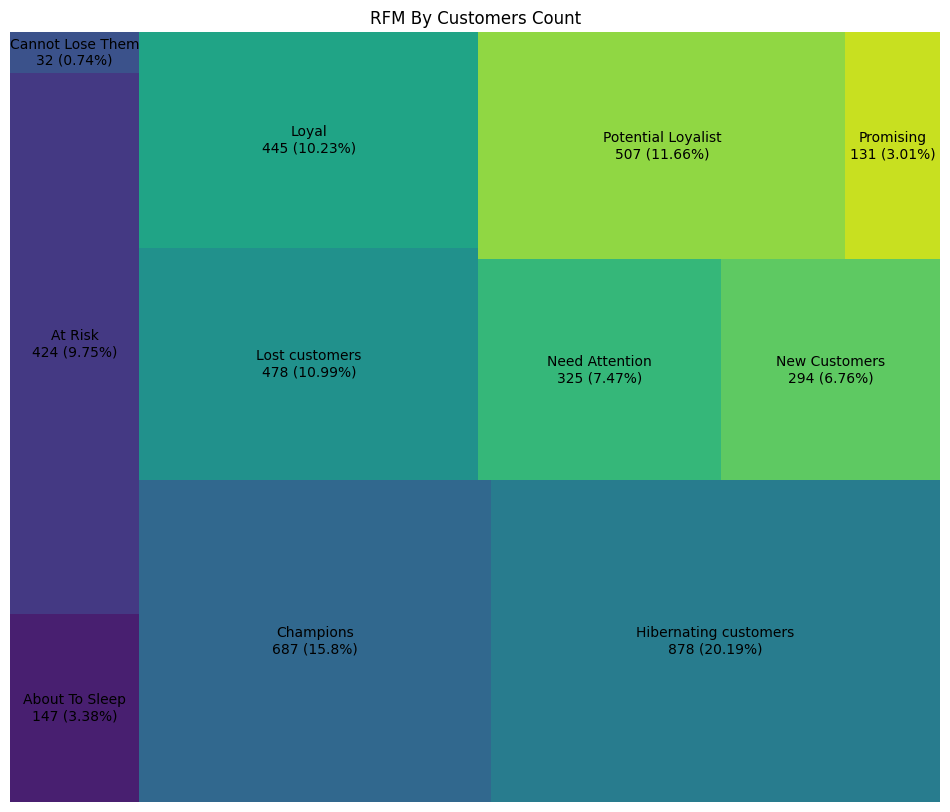

In [69]:

import squarify
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
squarify.plot(
    rfm_summarised['CustomerCount'].to_list(),
    label = rfm_summarised['Segment'] + '\n' + rfm_summarised['CustomerCount'].astype(str) + ' (' + rfm_summarised["CustomerCountPercent"].astype(str) + '%)',
    color = sns.color_palette ('viridis', len( rfm_summarised['Segment'].to_list()))
)
plt.title ('RFM By Customers Count')
plt.axis("off")

(0.0, 100.0, 0.0, 100.0)

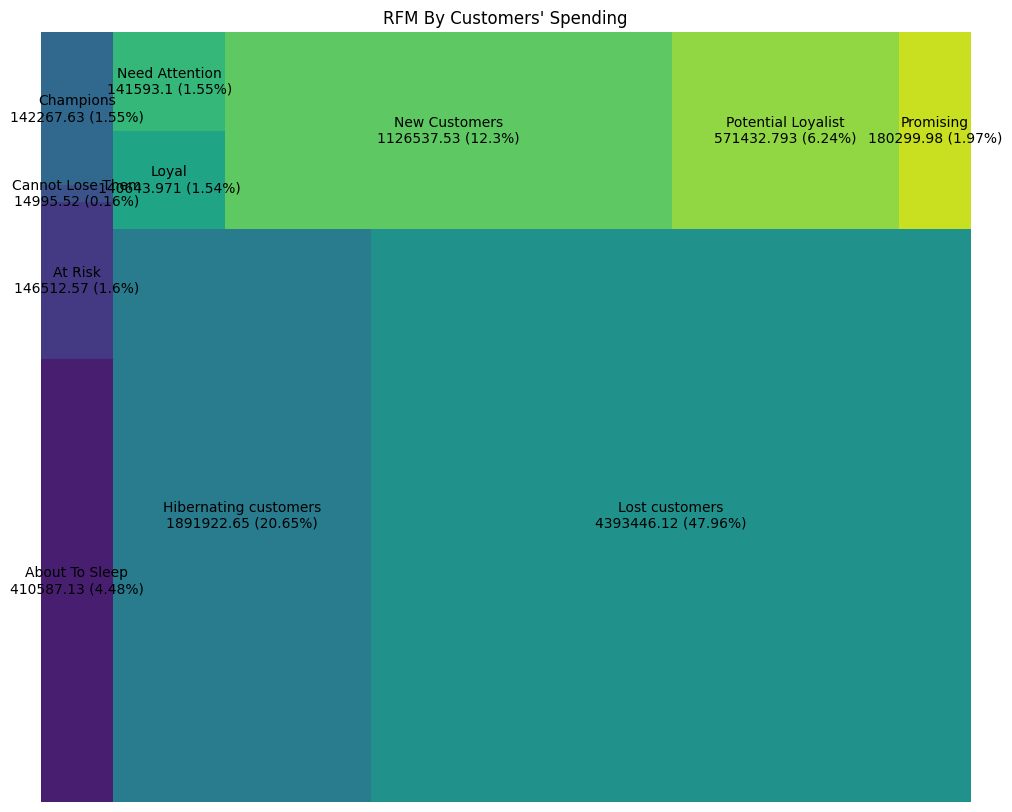

In [70]:
plt.figure(figsize=(12, 10))
cal_percent (rfm_summarised, 'TotalSales')
squarify.plot(
    rfm_summarised['TotalSales'].to_list(),
    label = rfm_summarised['Segment'] + '\n' + rfm_summarised['TotalSales'].astype(str) + ' (' + rfm_summarised["TotalSalesPercent"].astype(str) + '%)',
    color = sns.color_palette ('viridis', len( rfm_summarised['Segment'].to_list()))
)
plt.title ("RFM By Customers' Spending")
plt.axis("off")

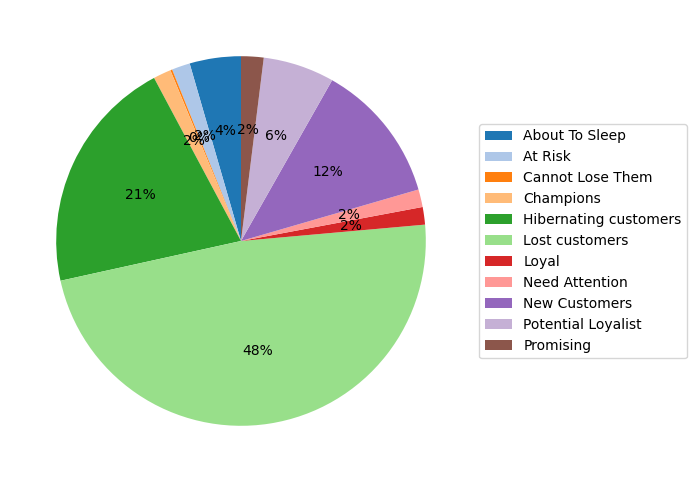

In [71]:
plt.figure (figsize = (8, 6))
plt.pie(
    rfm_summarised['TotalSales'].to_list(),
    colors=sns.color_palette('tab20'),
    startangle = 90,
    autopct='%.0f%%'
)
plt.legend(
    labels = rfm_summarised['Segment'].to_list(),
    # bbox_to_anchor=(0.75, 1.15),
    # ncol= len(rfm_summarised['Segment'].to_list())/ 5,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
    )
# displaying chart
plt.show()

<Axes: xlabel='R', ylabel='F'>

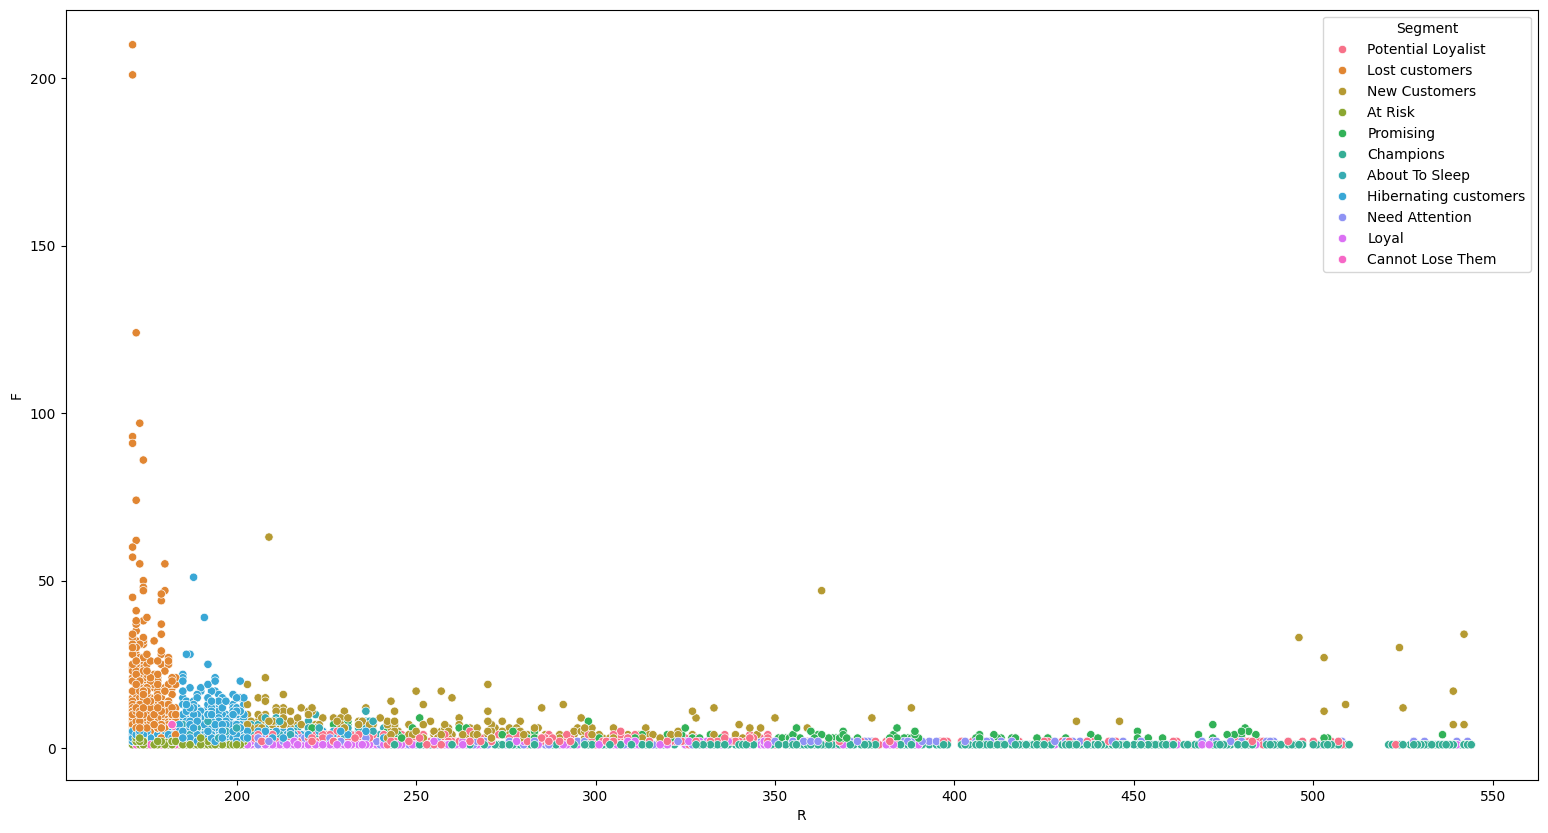

In [72]:
plt.figure(figsize=(19, 10))
sns.scatterplot(x = 'R', y = 'F', data = rfm, hue = 'Segment', sizes= 'M',  legend = 'brief')

In [73]:
rfm_summarised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Segment               11 non-null     object 
 1   CustomerCount         11 non-null     int64  
 2   TotalRecency          11 non-null     int64  
 3   TotalSales            11 non-null     float64
 4   TotalFreq             11 non-null     int64  
 5   MeanRecency           11 non-null     float64
 6   MeanFreq              11 non-null     float64
 7   MeanSales             11 non-null     float64
 8   CustomerCountPercent  11 non-null     float64
 9   TotalSalesPercent     11 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1008.0+ bytes


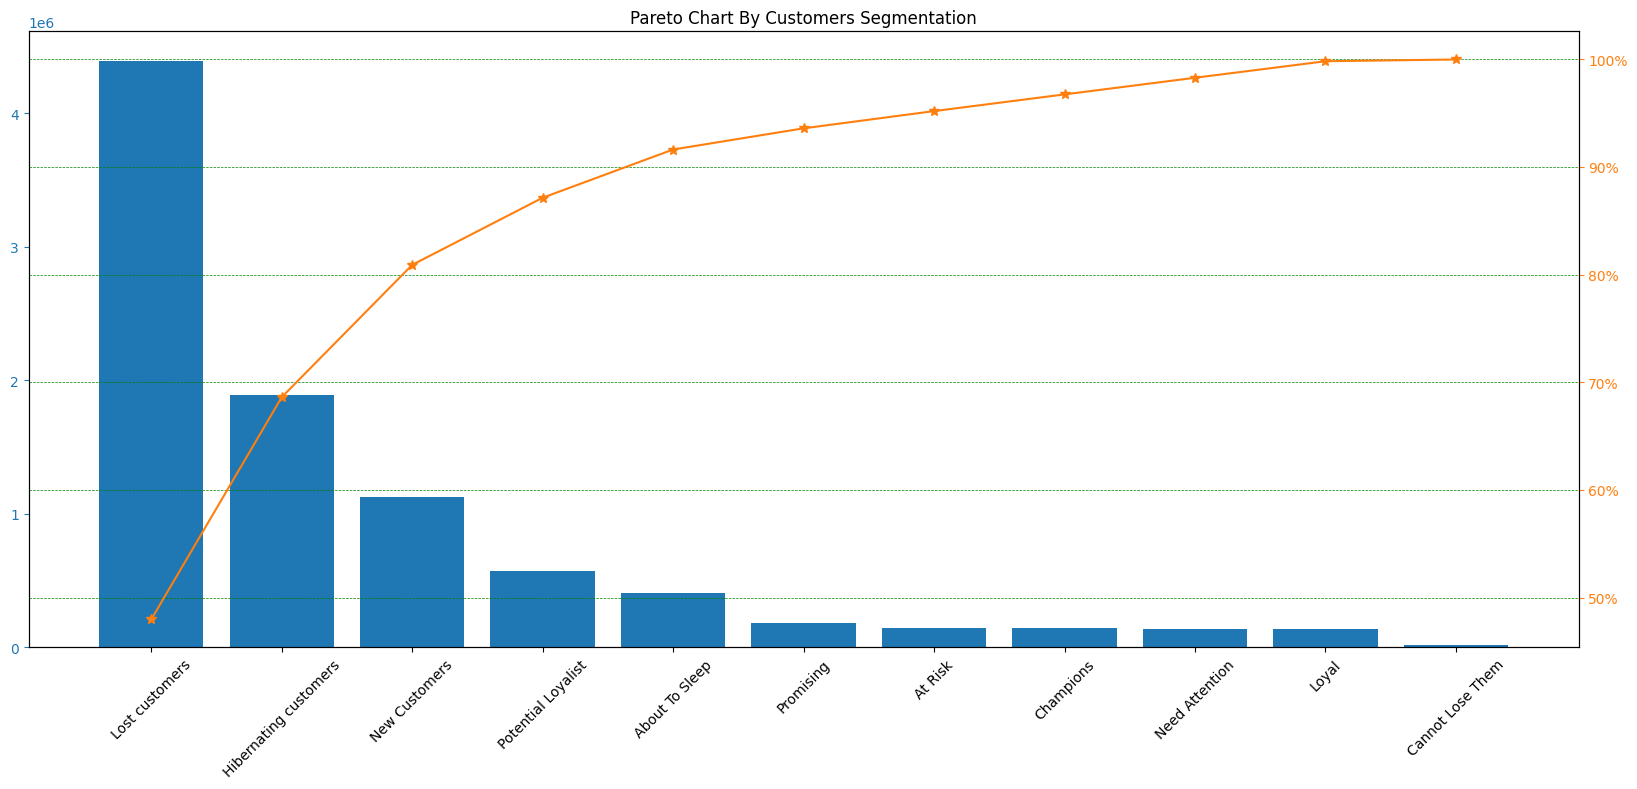

In [74]:
from matplotlib.ticker import PercentFormatter

rfm_summarised = rfm_summarised.sort_values(by='TotalSales',ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["TotalSales"].cumsum()/rfm_summarised["TotalSales"].sum()*100

fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised['Segment'], rfm_summarised["TotalSales"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised['Segment'], rfm_summarised["cumpercentage"], color="C1", marker="*", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title ('Pareto Chart By Customers Segmentation')
plt.show()